In [ ]:
### problem statement 

In the agricultural sector, farmers often face challenges in choosing the right crop to cultivate, leading to suboptimal yield and income. These decisions are usually based on intuition or traditional practices rather than data-driven insights. A system that can recommend the most suitable crop based on real-time environmental and soil parameters can significantly improve productivity and sustainability.

In [5]:
## Import all library 

In [62]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib as mlp 
from sklearn.metrics import accuracy_score

### Import Data 

In [7]:
df=pd.read_csv(r"C:\Users\Chetan Habib\Downloads\Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Look into dataset 

In [8]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [9]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [10]:
df.shape

(2200, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Data Preprocessing and EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [15]:
df.duplicated().sum()

0

<AxesSubplot:>

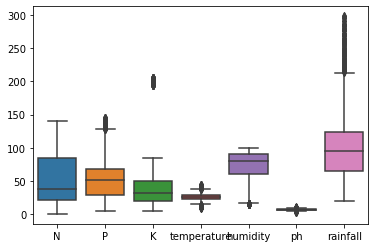

In [16]:
sns.boxplot(data=df)

In [17]:
df.columns 

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

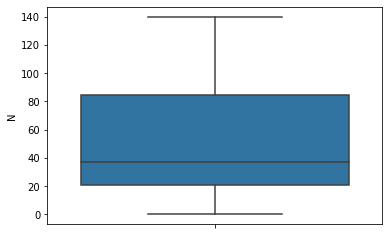

In [18]:
ax = sns.boxplot(y=df.N) 

In [19]:
### Detected outlier solved using IQR method replaced outlier with upper and lOwer limit 

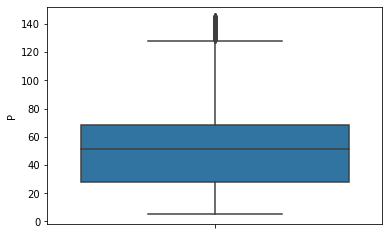

In [20]:
ax = sns.boxplot(y=df.P) 

In [21]:
q1 = df['P'].quantile(0.25)
q3 = df['P'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range

In [22]:
Lower_limit,upper_limit

(-32.0, 128.0)

In [23]:
df['P']=np.where(df['P'] > upper_limit,upper_limit,df['P']) 

In [24]:
df['P']=np.where(df['P'] < Lower_limit,Lower_limit,df['P'])  

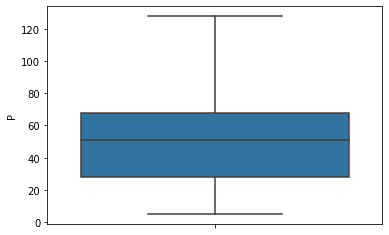

In [25]:
ax = sns.boxplot(y=df["P"])

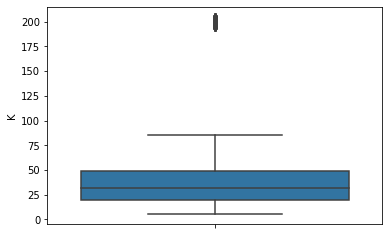

In [26]:
ax = sns.boxplot(y=df.K) 

In [27]:
q1 = df['K'].quantile(0.25)
q3 = df['K'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
df['K']=np.where(df['K'] > upper_limit,upper_limit,df['K']) 
df['K']=np.where(df['K'] < Lower_limit,Lower_limit,df['K'])  

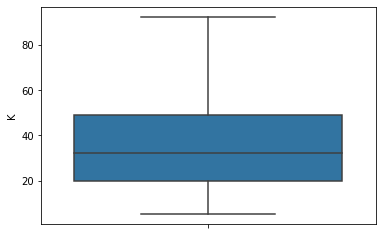

In [28]:
ax = sns.boxplot(y=df["K"]) 

In [29]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [30]:
q1 = df['temperature'].quantile(0.25)
q1 = df['temperature'].quantile(0.25)
q3 = df['temperature'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
df['temperature']=np.where(df['temperature'] > upper_limit,upper_limit,df['temperature']) 
df['temperature']=np.where(df['temperature'] < Lower_limit,Lower_limit,df['temperature']) 

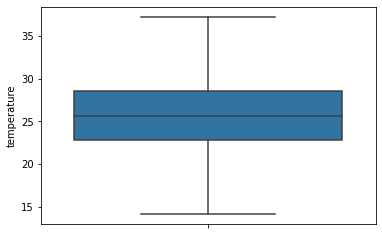

In [31]:
ax = sns.boxplot(y=df["temperature"]) 

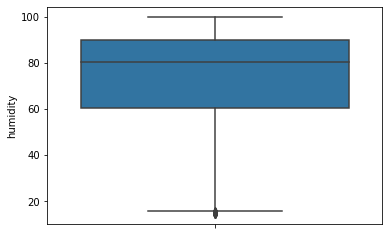

In [32]:
ax = sns.boxplot(y=df["humidity"]) 

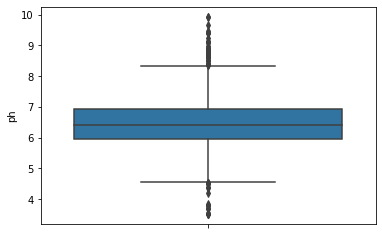

In [33]:
ax = sns.boxplot(y=df["ph"]) 

In [34]:
q1 = df['ph'].quantile(0.25)
q3 = df['ph'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
df['ph']=np.where(df['ph'] > upper_limit,upper_limit,df['ph']) 
df['ph']=np.where(df['ph'] < Lower_limit,Lower_limit,df['ph']) 

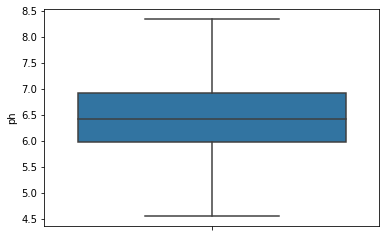

In [35]:
ax = sns.boxplot(y=df["ph"]) 

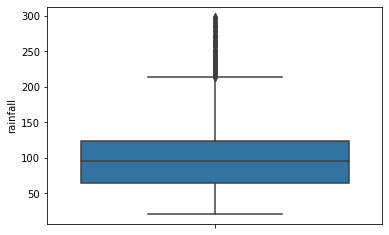

In [36]:
ax = sns.boxplot(y=df["rainfall"]) 

In [37]:
q1 = df['rainfall'].quantile(0.25)
q3 = df['rainfall'].quantile(0.75)
iqr = q3-q1 #Interquartile range
Lower_limit  = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
df['rainfall']=np.where(df['rainfall'] > upper_limit,upper_limit,df['rainfall']) 
df['rainfall']=np.where(df['rainfall'] < Lower_limit,Lower_limit,df['rainfall']) 

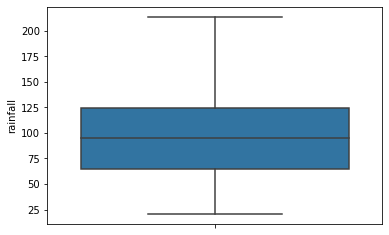

In [38]:
ax = sns.boxplot(y=df["rainfall"]) 

In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [40]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

print(df)

        N     P     K  temperature   humidity        ph    rainfall  label
0      90  42.0  43.0    20.879744  82.002744  6.502985  202.935536     20
1      85  58.0  41.0    21.770462  80.319644  7.038096  213.841241     20
2      60  55.0  44.0    23.004459  82.320763  7.840207  213.841241     20
3      74  35.0  40.0    26.491096  80.158363  6.980401  213.841241     20
4      78  42.0  42.0    20.130175  81.604873  7.628473  213.841241     20
...   ...   ...   ...          ...        ...       ...         ...    ...
2195  107  34.0  32.0    26.774637  66.413269  6.780064  177.774507      5
2196   99  15.0  27.0    27.417112  56.636362  6.086922  127.924610      5
2197  118  33.0  30.0    24.131797  67.225123  6.362608  173.322839      5
2198  117  32.0  34.0    26.272418  52.127394  6.758793  127.175293      5
2199  104  18.0  30.0    23.603016  60.396475  6.779833  140.937041      5

[2200 rows x 8 columns]


In [41]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85,58.0,41.0,21.770462,80.319644,7.038096,213.841241,20
2,60,55.0,44.0,23.004459,82.320763,7.840207,213.841241,20
3,74,35.0,40.0,26.491096,80.158363,6.980401,213.841241,20
4,78,42.0,42.0,20.130175,81.604873,7.628473,213.841241,20
...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5


<AxesSubplot:>

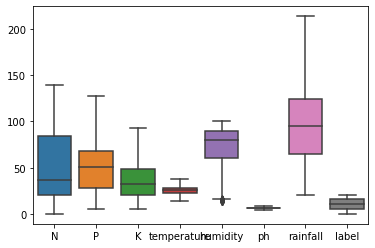

In [42]:
sns.boxplot(data=df)

### Data Visulization 

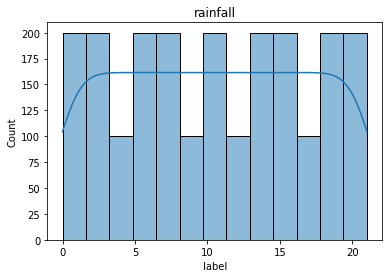

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['label'], kde=True)
plt.title('rainfall')
plt.show()

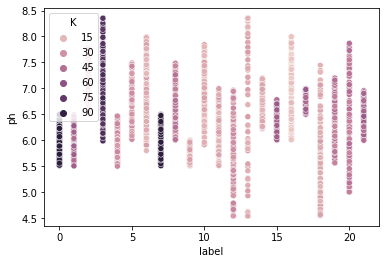

In [44]:
sns.scatterplot(x='label', y='ph', hue='K', data=df)
plt.show()

<AxesSubplot:xlabel='P', ylabel='label'>

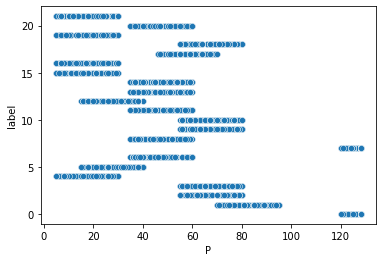

In [45]:
sns.scatterplot(x='P',y='label',data=df)

### Data Partition 

In [46]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df.drop('label', axis = 1)
Y = df[['label']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

C:\Users\Chetan Habib\AppData\Local\Temp\ipykernel_8364\2207871717.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

## Feature Importance 

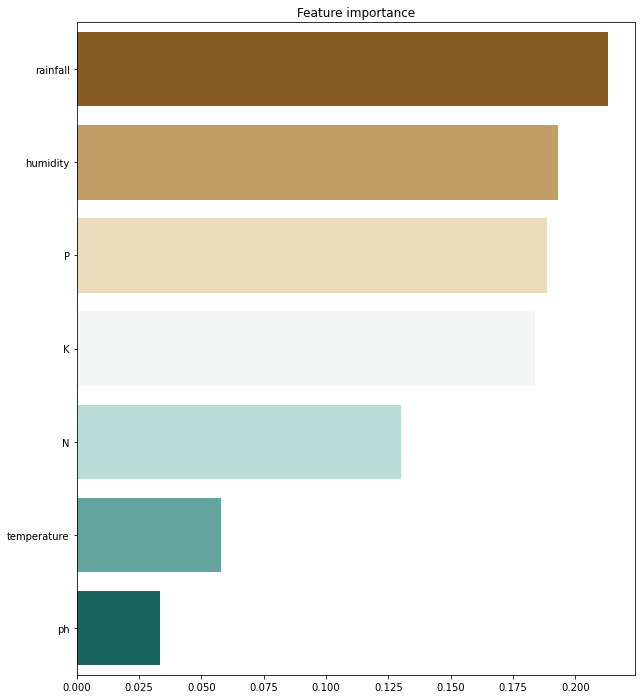

In [47]:
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

In [48]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

In [49]:
# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [50]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,label,N,P,K,temperature,humidity,ph,rainfall
351,9,3,67.0,24.0,17.000676,19.907905,5.520880,103.292641
58,20,71,46.0,40.0,20.280194,82.123542,7.236705,191.953574
1096,1,92,81.0,52.0,28.010680,76.528081,5.891414,103.704078
2133,5,82,24.0,33.0,26.535432,67.096081,6.809594,120.649443
1372,21,90,14.0,52.0,24.847408,89.204546,6.391858,59.679272


In [51]:
independent_variable = list(train.columns[1:])
independent_variable

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [83]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [52]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df.drop('label', axis = 1)
Y = df[['label']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

C:\Users\Chetan Habib\AppData\Local\Temp\ipykernel_8364\2207871717.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Model.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

In [55]:
unique_count = df['label'].nunique()
unique_count

22

In [57]:
print(df['label'].value_counts())
df

20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: label, dtype: int64


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,20
1,85,58.0,41.0,21.770462,80.319644,7.038096,213.841241,20
2,60,55.0,44.0,23.004459,82.320763,7.840207,213.841241,20
3,74,35.0,40.0,26.491096,80.158363,6.980401,213.841241,20
4,78,42.0,42.0,20.130175,81.604873,7.628473,213.841241,20
...,...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507,5
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610,5
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839,5
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293,5


In [ ]:
df

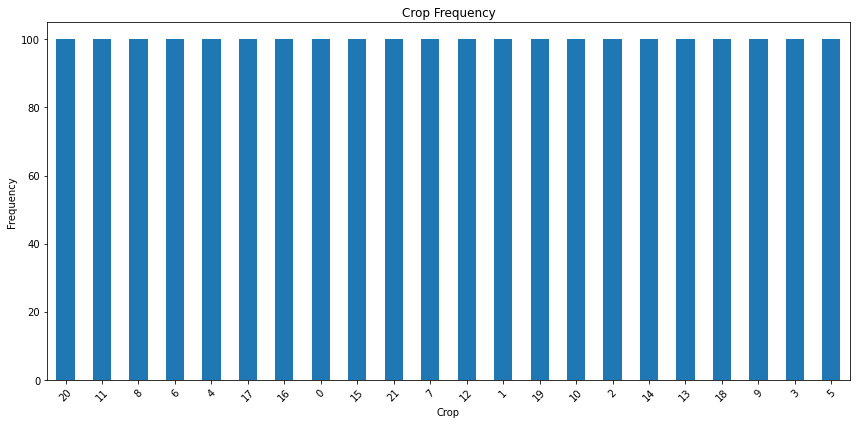

In [60]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar', figsize=(12, 6), title='Crop Frequency')
plt.xlabel('Crop')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
X = df.drop(columns=['label'])  # features
y = df['label']                 # target

# Split data into training and testing (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy: {accuracy:.2f}")

Random Forest accuracy: 0.99


Confusion Matrix:
[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0

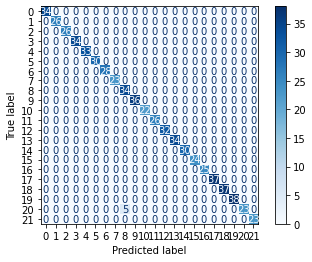

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# After predicting y_pred from the model

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# (Optional) Plot the confusion matrix for better visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()